**Real Vs Fake News Pre-processing**



Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.util import ngrams
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Data Collection and Reading through Pandas**

---



In [ ]:
true_df = pd.read_csv('/content/drive/MyDrive/True.csv')
false_df = pd.read_csv('/content/drive/MyDrive/Fake.csv')



In [ ]:
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
false_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


Cleaning the datasets and EDA

---



In [ ]:
print(true_df.groupby('subject').describe())

              title                                                            \
              count unique                                                top   
subject                                                                         
politicsNews  11272  11150  Factbox: Trump fills top jobs for his administ...   
worldnews     10145   9957  Factbox: International reaction to arrest of R...   

                    text         \
             freq  count unique   
subject                           
politicsNews   14  11272  11214   
worldnews       6  10145   9989   

                                                                       date  \
                                                            top freq  count   
subject                                                                       
politicsNews  (Reuters) - Highlights for U.S. President Dona...    8  11272   
worldnews     YANGON (Reuters) - Two Reuters journalists who...    2  10145   

                      

In [ ]:
print(false_df.groupby('subject').describe())

                title         \
                count unique   
subject                        
Government News  1570   1570   
Middle-east       778    778   
News             9050   9049   
US_News           783    783   
left-news        4459   4455   
politics         6841   6834   

                                                                         text  \
                                                               top freq count   
subject                                                                         
Government News  TOP FIVE Food Stamp Fraud Takedowns of 2017…Do...    1  1570   
Middle-east              YEAR IN REVIEW: 2017 Top Ten Conspiracies    1   778   
News              McConnell Says He’ll Obstruct ANY Effort To H...    2  9050   
US_News                  YEAR IN REVIEW: 2017 Top Ten Conspiracies    1   783   
left-news        MEDIA IGNORES Time That Bill Clinton FIRED His...    3  4459   
politics         MEDIA IGNORES Time That Bill Clinton FIRED His

In [ ]:
#adding an addtional category column in both the dataframes before concatenation so that news type can be identified 
true_df['category']=1
false_df['category']=0

In [ ]:
news_df=pd.concat([true_df,false_df])
news_df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
print(news_df.groupby('category').describe())

          title                                                            \
          count unique                                                top   
category                                                                    
0         23481  17903  MEDIA IGNORES Time That Bill Clinton FIRED His...   
1         21417  20826  Factbox: Trump fills top jobs for his administ...   

                text         \
         freq  count unique   
category                      
0           6  23481  17455   
1          14  21417  21192   

                                                                 subject  \
                                                        top freq   count   
category                                                                   
0                                                            626   23481   
1         (Reuters) - Highlights for U.S. President Dona...    8   21417   

                                       date                                  

In [ ]:
print(news_df.groupby('subject').describe())


                category                                   
                   count mean  std  min  25%  50%  75%  max
subject                                                    
Government News   1570.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Middle-east        778.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
News              9050.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
US_News            783.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
left-news         4459.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
politics          6841.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
politicsNews     11272.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
worldnews        10145.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0


It is noticed that there is an unusually high number of news count in the last two categories from above stats

Checking the length of uncleaned text

---



In [ ]:
true_df['length'] = true_df['text'].map(lambda text: len(text))
print (true_df)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv... 

In [ ]:
false_df['length'] = false_df['text'].map(lambda text: len(text))
print (false_df)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...    

In [ ]:
news2_df=pd.concat([true_df,false_df])
news2_df

,title,text,subject,date,category,length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,4659
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,4077
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,2789
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,2461
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,5204
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,3237
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,1684
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,25065
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,2685


Visualizing the length of texts in both cases and trying to compare

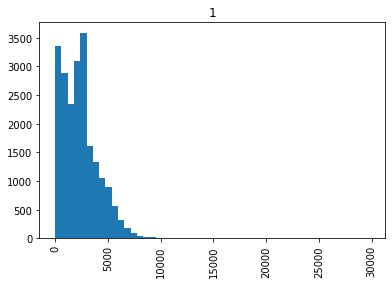

In [ ]:
plt.show(true_df.hist(column='length', by='category', bins=50))

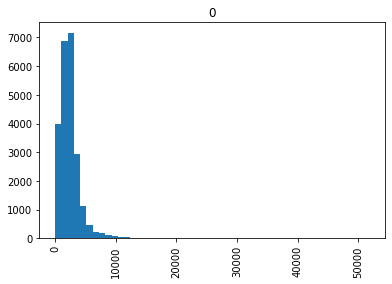

In [ ]:
plt.show(false_df.hist(column='length', by='category', bins=50))

Some more EDA on textual data

---



Checking for blank rows of data and dropping them

In [ ]:
[index for index,text in enumerate(true_df.text.values) if str(text).strip() == '']

[8970]

In [ ]:
true_df = true_df.drop(8970, axis=0)

In [ ]:
empty_fake_index = [index for index,text in enumerate(false_df.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
false_df.iloc[empty_fake_index].tail()

No of empty rows: 630


,title,text,subject,date,category,length
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",0,1
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",0,1
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",0,1
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",0,1
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",0,1


Since so many blank rows are observed in case of false news, we concatenate title and text into one new feature for easy work

In [ ]:
true_df["text"] = true_df["title"] + " " + true_df["text"]
false_df["text"] = false_df["title"] + " " + false_df["text"]

We also remove subject, date and title features we don't require them in this case of textual analysis

In [ ]:
true_df = true_df.drop(["subject", "date","title"], axis=1)
false_df = false_df.drop(["subject", "date", "title"], axis=1)

In [ ]:
true_df.head()

,text,category,length
0,"As U.S. budget fight looms, Republicans flip t...",1,4659
1,U.S. military to accept transgender recruits o...,1,4077
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,2789
3,FBI Russia probe helped by Australian diplomat...,1,2461
4,Trump wants Postal Service to charge 'much mor...,1,5204


In [ ]:
false_df.head()

,text,category,length
0,Donald Trump Sends Out Embarrassing New Year’...,0,2893
1,Drunk Bragging Trump Staffer Started Russian ...,0,1898
2,Sheriff David Clarke Becomes An Internet Joke...,0,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,0,2774
4,Pope Francis Just Called Out Donald Trump Dur...,0,2346


In [ ]:
news3_df=pd.concat([true_df,false_df])
news3_df

,text,category,length
0,"As U.S. budget fight looms, Republicans flip t...",1,4659
1,U.S. military to accept transgender recruits o...,1,4077
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,2789
3,FBI Russia probe helped by Australian diplomat...,1,2461
4,Trump wants Postal Service to charge 'much mor...,1,5204
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,0,3237
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0,1684
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0,25065
23479,How to Blow $700 Million: Al Jazeera America F...,0,2685


In [ ]:
false_df = false_df.drop(["length"],axis=1)

In [ ]:
true_df = true_df.drop(["length"],axis=1)

This is the extracted textual data from all kinds of news

In [ ]:
text_df=news3_df['text']
text_df


0        As U.S. budget fight looms, Republicans flip t...
1        U.S. military to accept transgender recruits o...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped by Australian diplomat...
4        Trump wants Postal Service to charge 'much mor...
                               ...                        
23476    McPain: John McCain Furious That Iran Treated ...
23477    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478    Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479    How to Blow $700 Million: Al Jazeera America F...
23480    10 U.S. Navy Sailors Held by Iranian Military ...
Name: text, Length: 44897, dtype: object

Filtering this data by removing punctuations, links, and coverting to lower case

In [ ]:
news3_df['text'] = news3_df['text'].apply((lambda y:re.sub("http://\S+"," ", y)))
news3_df['text'] = news3_df['text'].apply((lambda x:re.sub("\@", " ",x.lower())))
news3_df['text'] = news3_df['text'].apply((lambda z:re.sub(r'[^\w\s]', '', z)))



In [ ]:
print(news3_df['text'])


0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
23476    mcpain john mccain furious that iran treated u...
23477    justice yahoo settles email privacy classactio...
23478    sunnistan us and allied safe zone plan to take...
23479    how to blow 700 million al jazeera america fin...
23480    10 us navy sailors held by iranian military  s...
Name: text, Length: 44897, dtype: object


Since this data is large, for easy running, we split the dataset into  first five rows of true and last five rows of fake news

In [ ]:
tnews=news3_df.head()
fnews=news3_df.tail()

Removing the stop words 

In [ ]:
stop = stopwords.words('english')
tnews['text']= tnews['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
tnews['text']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    us budget fight looms republicans flip fiscal ...
1    us military accept transgender recruits monday...
2    senior us republican senator let mr mueller jo...
3    fbi russia probe helped australian diplomat ti...
4    trump wants postal service charge much amazon ...
Name: text, dtype: object

In [ ]:
fnews['text']= fnews['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
fnews['text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


23476    mcpain john mccain furious iran treated us sai...
23477    justice yahoo settles email privacy classactio...
23478    sunnistan us allied safe zone plan take territ...
23479    blow 700 million al jazeera america finally ca...
23480    10 us navy sailors held iranian military signs...
Name: text, dtype: object

Tokenization

In [ ]:
print(tnews.text.head().apply(word_tokenize))

0    [us, budget, fight, looms, republicans, flip, ...
1    [us, military, accept, transgender, recruits, ...
2    [senior, us, republican, senator, let, mr, mue...
3    [fbi, russia, probe, helped, australian, diplo...
4    [trump, wants, postal, service, charge, much, ...
Name: text, dtype: object


In [ ]:
print(fnews.text.head().apply(word_tokenize))

23476    [mcpain, john, mccain, furious, iran, treated,...
23477    [justice, yahoo, settles, email, privacy, clas...
23478    [sunnistan, us, allied, safe, zone, plan, take...
23479    [blow, 700, million, al, jazeera, america, fin...
23480    [10, us, navy, sailors, held, iranian, militar...
Name: text, dtype: object


Word Cloud Generation

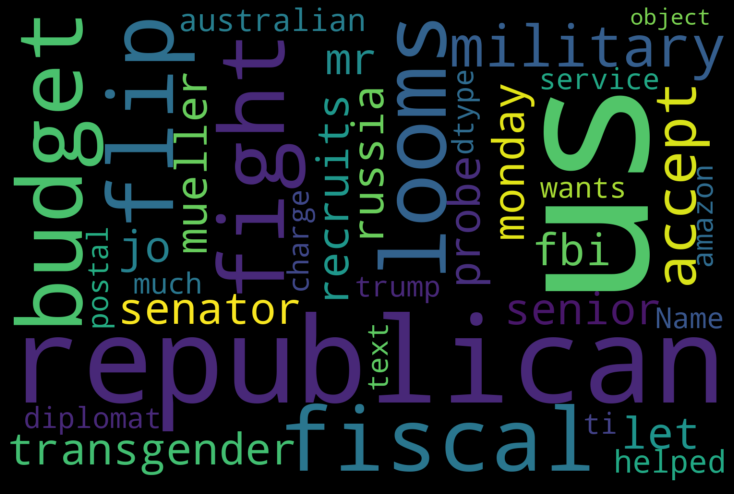

In [ ]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 1500,
        height = 1000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (10, 10),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
generate_word_cloud(tnews.text)

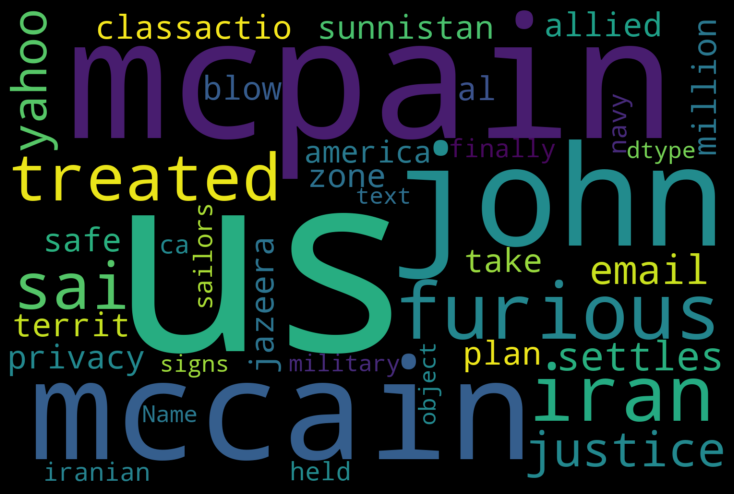

In [ ]:
generate_word_cloud(fnews.text)

Lemmatizing the words

Making a function for lemmatizer

In [ ]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word,pos="v") for word in words if word not in stopwords]

Displaying the words and their count

In [ ]:
true_word = basic_clean(''.join(str(tnews['text'].tolist())))
true_word

['us',
 'budget',
 'fight',
 'loom',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'us',
 'congress',
 'vote',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cut',
 'call',
 'fiscal',
 'conservative',
 'sunday',
 'urge',
 'budget',
 'restraint',
 '2018',
 'keep',
 'sharp',
 'pivot',
 'way',
 'among',
 'republicans',
 'us',
 'representative',
 'mark',
 'meadows',
 'speak',
 'cbs',
 'face',
 'nation',
 'draw',
 'hard',
 'line',
 'federal',
 'spend',
 'lawmakers',
 'brace',
 'battle',
 'january',
 'return',
 'holiday',
 'wednesday',
 'lawmakers',
 'begin',
 'try',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'link',
 'issue',
 'immigration',
 'policy',
 'even',
 'november',
 'congressional',
 'election',
 'campaign',
 'approach',
 'republicans',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'big',
 'budget',
 'increa

In [ ]:
tword_freq=pd.value_counts(np.array(true_word))[:20]
tword_freq

trump             49
say               42
service           23
postal            18
us                17
transgender       16
amazon            14
administration    13
house             13
package           12
campaign          12
president         12
republican        12
would             12
federal           11
investigation     11
russia            11
percent           11
time              11
republicans       10
dtype: int64

Visualizing through a histogram

Text(0.5, 0, '# of Occurances')

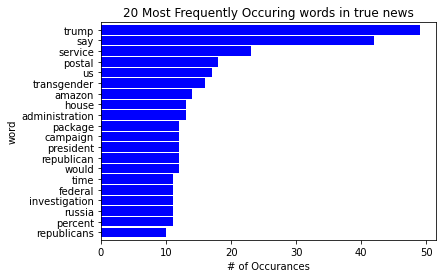

In [ ]:
tword_freq.sort_values().plot.barh(color='blue', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring words in true news')
plt.ylabel('word')
plt.xlabel('# of Occurances')

Repeating the above steps for fake news

In [ ]:
false_word = basic_clean(''.join(str(fnews['text'].tolist())))
false_word

['mcpain',
 'john',
 'mccain',
 'furious',
 'iran',
 'treat',
 'us',
 'sailors',
 'well',
 '21st',
 'century',
 'wire',
 'say',
 '21wire',
 'report',
 'earlier',
 'week',
 'unlikely',
 'mishap',
 'two',
 'us',
 'naval',
 'vessels',
 'stray',
 'iranian',
 'water',
 'hours',
 'president',
 'state',
 'union',
 'speech',
 'follow',
 'usual',
 'parade',
 'archneocons',
 'come',
 'tv',
 'real',
 'time',
 'declare',
 'incident',
 'act',
 'aggression',
 'iran',
 'unite',
 'state',
 'mere',
 'coincidence24',
 'hours',
 'incident',
 'iranians',
 'return',
 '11',
 'us',
 'sailors',
 'unharmed',
 'good',
 'spirit',
 'remain',
 'casualty',
 'event',
 'incident',
 'common',
 'condition',
 'washington',
 'know',
 'pretraumatic',
 'stress',
 'disorder',
 'suffer',
 'certain',
 'us',
 'senator',
 'mortify',
 'uneventful',
 'outcome',
 'follow',
 'daniel',
 'mcadams',
 'ron',
 'paul',
 'institute',
 'two',
 'us',
 'navy',
 'riverine',
 'command',
 'boat',
 'intercept',
 'iranian',
 'territorial',
 'wate

In [ ]:
fword_freq=pd.value_counts(np.array(false_word))[:20]
fword_freq

us            54
syria         53
turkey        23
state         23
isis          22
would         21
iranian       21
military      20
al            20
washington    20
iran          20
one           18
new           18
say           16
iraq          16
train         16
media         15
plan          15
zone          14
safe          14
dtype: int64

Text(0.5, 0, '# of Occurances')

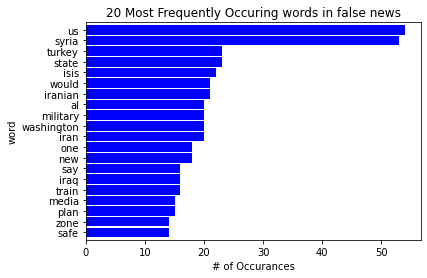

In [ ]:
fword_freq.sort_values().plot.barh(color='blue', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring words in false news')
plt.ylabel('word')
plt.xlabel('# of Occurances')

Using TFIDF on true news

In [ ]:
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_true = my_tfidf.fit_transform(tnews.text)

print(tfidf_true)

  (0, 676)	0.03807759255629173
  (0, 18)	0.03072076191839722
  (0, 289)	0.03807759255629173
  (0, 305)	0.03807759255629173
  (0, 124)	0.03072076191839722
  (0, 867)	0.03807759255629173
  (0, 699)	0.03807759255629173
  (0, 645)	0.03807759255629173
  (0, 809)	0.03807759255629173
  (0, 386)	0.03807759255629173
  (0, 105)	0.06144152383679444
  (0, 24)	0.03807759255629173
  (0, 48)	0.11423277766887519
  (0, 278)	0.03807759255629173
  (0, 725)	0.03807759255629173
  (0, 698)	0.03807759255629173
  (0, 354)	0.03807759255629173
  (0, 325)	0.07615518511258346
  (0, 722)	0.03807759255629173
  (0, 435)	0.03072076191839722
  (0, 748)	0.03807759255629173
  (0, 789)	0.03807759255629173
  (0, 862)	0.03807759255629173
  (0, 327)	0.03807759255629173
  (0, 250)	0.03807759255629173
  :	:
  (4, 268)	0.017551138826788774
  (4, 493)	0.021143649208192658
  (4, 16)	0.017551138826788774
  (4, 104)	0.021143649208192658
  (4, 569)	0.06343094762457797
  (4, 672)	0.017551138826788774
  (4, 339)	0.021143649208192658


Implementing N-Grams and visualizing

In [ ]:
true_bigrams= (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]
true_bigrams

(postal, service)          15
(trump, campaign)           7
(white, house)              6
(york, time)                5
(new, york)                 5
(trump, administration)     5
(post, office)              4
(special, counsel)          4
(jan, 1)                    4
(trump, ally)               4
(washington, reuters)       4
(donald, trump)             4
(time, report)              4
(accept, transgender)       3
(charge, much)              3
(decline, comment)          3
(package, delivery)         3
(australian, diplomat)      3
(us, postal)                3
(president, donald)         3
dtype: int64

Text(0.5, 0, '# of Occurances')

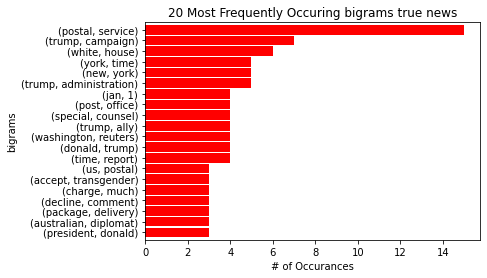

In [ ]:
true_bigrams.sort_values().plot.barh(color='red', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring bigrams true news')
plt.ylabel('bigrams')
plt.xlabel('# of Occurances')

In [ ]:
true_trigrams= (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]
true_trigrams

(new, york, time)                        5
(accept, transgender, recruit)           3
(us, postal, service)                    3
(york, time, report)                     3
(president, donald, trump)               3
(let, mr, mueller)                       2
(bias, republican, president)            2
(federal, bureau, investigation)         2
(counsel, robert, mueller)               2
(adviser, george, papadopoulos)          2
(postal, service, charge)                2
(special, counsel, robert)               2
(postal, regulatory, commission)         2
(begin, accept, transgender)             2
(want, somebody, look)                   2
(take, office, january)                  2
(increase, nondefense, discretionary)    2
(nondefense, discretionary, spend)       2
(white, house, since)                    2
(link, trump, campaign)                  2
dtype: int64

Text(0.5, 0, '# of Occurances')

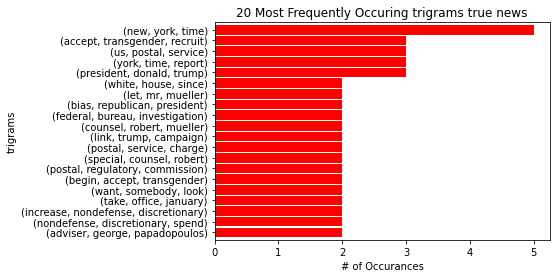

In [ ]:
true_trigrams.sort_values().plot.barh(color='red', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring trigrams true news')
plt.ylabel('trigrams')
plt.xlabel('# of Occurances')

In [ ]:
false_bigrams= (pd.Series(nltk.ngrams(false_word, 2)).value_counts())[:20]
false_bigrams

(safe, zone)               10
(21st, century)            10
(century, wire)             9
(train, equip)              7
(al, jazeera)               7
(us, navy)                  6
(inside, syria)             5
(al, nusra)                 5
(john, mccain)              5
(islamic, state)            5
(take, place)               5
(isis, oil)                 5
(500, million)              5
(us, military)              5
(obama, administration)     4
(persian, gulf)             4
(jazeera, america)          4
(nuclear, deal)             4
(greater, kurdistan)        4
(news, 21st)                4
dtype: int64

Text(0.5, 0, '# of Occurances')

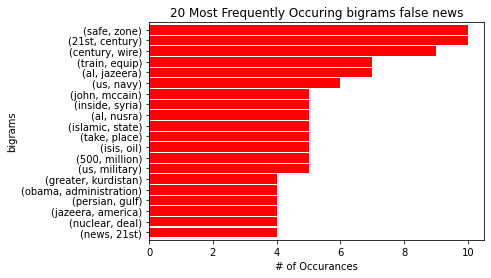

In [ ]:
false_bigrams.sort_values().plot.barh(color='red', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring bigrams false news')
plt.ylabel('bigrams')
plt.xlabel('# of Occurances')

In [ ]:
false_trigrams= (pd.Series(nltk.ngrams(false_word, 3)).value_counts())[:20]
false_trigrams

(21st, century, wire)           9
(century, wire, say)            4
(nation, builders, inc)         4
(al, jazeera, america)          4
(news, 21st, century)           4
(us, state, department)         3
(bashar, al, assad)             3
(train, equip, program)         3
(state, union, speech)          2
(cnn, wolf, blitzer)            2
(10, us, navy)                  2
(al, nusra, front)              2
(rebel, terrorist, fighters)    2
(facto, sunni, state)           2
(de, facto, sunni)              2
(washington, london, paris)     2
(gen, lloyd, austin)            2
(regime, change, rhetoric)      2
(iran, nuclear, deal)           2
(isis, al, nusra)               2
dtype: int64

Text(0.5, 0, '# of Occurances')

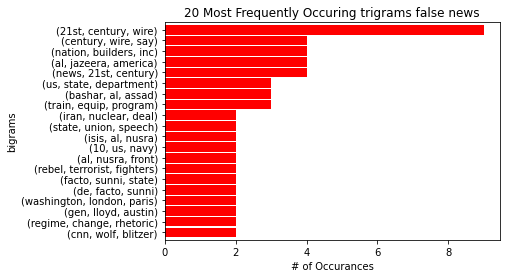

In [ ]:
false_trigrams.sort_values().plot.barh(color='red', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring trigrams false news')
plt.ylabel('bigrams')
plt.xlabel('# of Occurances')